In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline


In [93]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)

#mapping={'Male':1,'Female':0}
#data.replace({'Male':mapping,'Female':mapping})

X=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education','Gender']]
Z=data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y=data['Balance']

#Observar la proporción entre mujeres y hombres
print X.Gender.describe()

X=X.replace([' Male','Female'],[0,1])


count        400
unique         2
top       Female
freq         207
Name: Gender, dtype: object


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


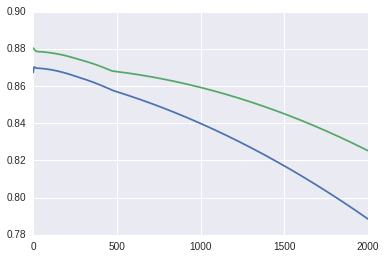

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)



alpha=np.linspace(0,2000,10000)
score=np.zeros([2,len(alpha)])
scorez=np.zeros([2,len(alpha)])

betas=np.zeros([8,len(alpha)])
betasz=np.zeros([7,len(alpha)])
       

for i in range(0,len(alpha)):
    clf= linear_model.Lasso(alpha=alpha[i])
    clf.fit(X_train,Y_train)
    betas[1:,i]=clf.coef_
    betas[0,i]=clf.intercept_
    score[0,i]=clf.score(X_test,Y_test)
    score[1,i]=clf.score(X_train,Y_train)
    scaler = preprocessing.StandardScaler().fit(X_test)

X_=scaler.transform(X)
 
plt.plot(alpha,score[0,:])
plt.plot(alpha,score[1,:])
plt.show()

In [95]:
clf= linear_model.Lasso(alpha=0)
clf.fit(X_train,Y_train)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(Y_train)
Y_train=scaler.transform(Y_train)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [103]:
for i in range(400):
    if (X_train[i,7]==-1.08347268):
        X_train[i,7]=0
    else:
        X_train[i,7]=1

[[-0.5885416  -0.08868549 -0.0268033  ...,  0.43124454 -0.8095962   1.        ]
 [-0.58496003 -0.45507303 -0.56375316 ...,  0.82914152  0.15548536  1.        ]
 [ 0.42832821  1.28459593  1.405063   ...,  0.65861424 -0.8095962   1.        ]
 ..., 
 [-0.89365582 -0.35518988 -0.34499581 ...,  0.54492939  1.12056692  1.        ]
 [-0.9783407  -0.76502435 -0.76925249 ..., -1.72876765  1.44226077  1.        ]
 [-0.40102718  0.82862708  0.75541995 ...,  0.77229909 -1.4529839   1.        ]]


In [104]:
clf= linear_model.Lasso(alpha=0)
clf.fit(X_train,Y_train)
clf.coef_

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app


In [ ]:
#la idea es hacer una prueba de significancia para el betta de Genero, saber si es o no estadísticamente diferente de 0
#Si sí es diferente, entonces sí hay diferencias en Balance según el género